In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import accuracy_score
import joblib

In [2]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [3]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data["Sleep Disorder"] = data["Sleep Disorder"].fillna(value="No Disorder")

In [6]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
data["Sleep Duration"].value_counts()

Sleep Duration
7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8.1    15
7.3    14
8.4    14
6.3    13
8.5    13
8.0    13
6.2    12
8.2    11
7.6    10
6.4     9
7.9     7
7.4     5
6.7     5
7.5     5
6.8     5
8.3     5
5.9     4
6.9     3
5.8     2
Name: count, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Text(0.5, 1.0, 'Outliers in Heart Rate column')

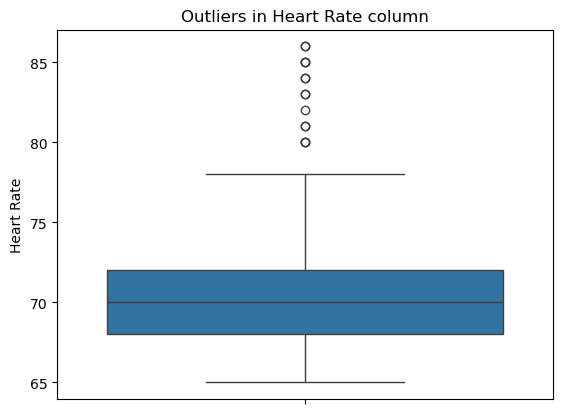

In [10]:
sns.boxplot(y=data["Heart Rate"])
plt.title("Outliers in Heart Rate column")

In [11]:
def IQR_calc(data, column):
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

In [12]:
data_num = data[["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]]
for column in data_num.columns:
    Q1, Q3, IQR = IQR_calc(data, column)
    lower_lim = Q1 - IQR * 2
    higher_lim = Q3 + IQR * 2
    data = data[(data[column] >= lower_lim) & (data[column] <= higher_lim)]

In [13]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


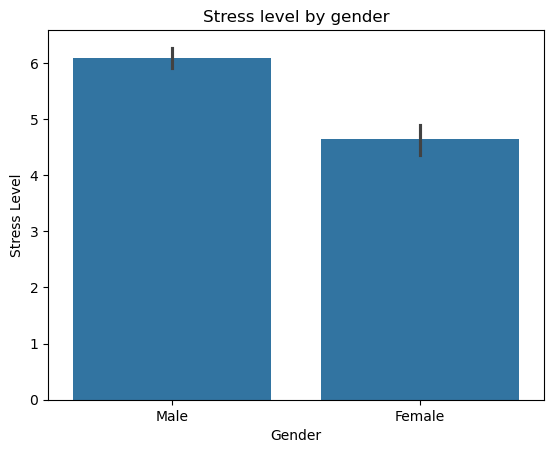

In [14]:
sns.barplot(data=data, x="Gender", y="Stress Level")

plt.title("Stress level by gender")
plt.show()

In [15]:
disorder_nr_male = len(data["Sleep Disorder"]) - sum((data["Sleep Disorder"] == "No Disorder") & (data.Gender == "Male"))
disorder_nr_female = len(data["Sleep Disorder"])- sum((data["Sleep Disorder"] == "No Disorder") & (data.Gender == "Female"))
print(disorder_nr_male)
print(disorder_nr_female)

225
280


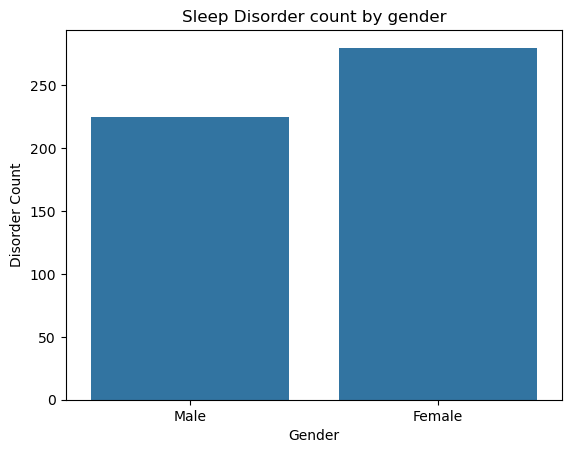

In [16]:
df = pd.DataFrame({
    "Gender": ["Male", "Female"],
    "Disorder Count": [disorder_nr_male, disorder_nr_female]
})

sns.barplot(data=df, x="Gender", y="Disorder Count")

plt.title("Sleep Disorder count by gender")
plt.show()

In [17]:
data_num_corr = data_num.corr()

<Axes: >

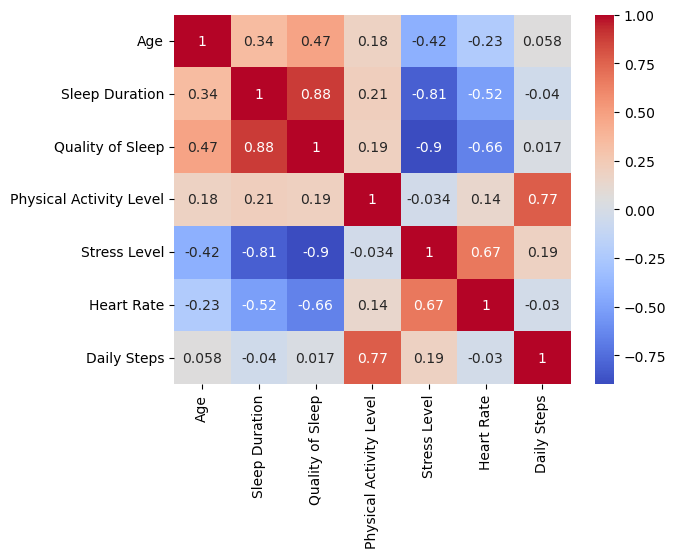

In [18]:
sns.heatmap(data_num_corr, annot=True, cmap="coolwarm")

In [19]:
data = data.drop(columns="Person ID")

In [20]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [21]:
def func(string):
    if string == "No Disorder":
        return 0
    else:
        return 1
data["Sleep Disorder (Yes/No)"] = data["Sleep Disorder"]
data["Sleep Disorder (Yes/No)"] = data["Sleep Disorder (Yes/No)"].apply(func)

In [22]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder (Yes/No)
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,0
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,0
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,0
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1


In [23]:
X = data[["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate"]]
y = data["Sleep Disorder (Yes/No)"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=68)

In [25]:
y_test

138    0
86     0
325    0
8      0
349    1
      ..
198    1
259    1
295    1
358    0
200    1
Name: Sleep Disorder (Yes/No), Length: 109, dtype: int64

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_predicted = model.predict(X_test)

In [29]:
MAE = mean_absolute_error(y_test, y_predicted)
MSE = mean_squared_error(y_test, y_predicted)
RMSE = np.sqrt(MSE)

In [30]:
MAE

0.23708167384395876

In [31]:
MSE

0.10470212769055467

In [32]:
RMSE

0.3235770815285821

### Test 2 (polinom grad 3 -> catastrofa)

In [33]:
X_2 = X

In [34]:
X_2

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate
0,27,6.1,6,42,6,77
1,28,6.2,6,60,8,75
2,28,6.2,6,60,8,75
7,29,7.8,7,75,6,70
8,29,7.8,7,75,6,70
...,...,...,...,...,...,...
369,59,8.1,9,75,3,68
370,59,8.0,9,75,3,68
371,59,8.1,9,75,3,68
372,59,8.1,9,75,3,68


In [35]:
polynom_conv = PolynomialFeatures(degree=3, include_bias=False)

In [36]:
x_converted = polynom_conv.fit_transform(X_2)

In [37]:
x_converted

array([[2.70000e+01, 6.10000e+00, 6.00000e+00, ..., 2.77200e+03,
        3.55740e+04, 4.56533e+05],
       [2.80000e+01, 6.20000e+00, 6.00000e+00, ..., 4.80000e+03,
        4.50000e+04, 4.21875e+05],
       [2.80000e+01, 6.20000e+00, 6.00000e+00, ..., 4.80000e+03,
        4.50000e+04, 4.21875e+05],
       ...,
       [5.90000e+01, 8.10000e+00, 9.00000e+00, ..., 6.12000e+02,
        1.38720e+04, 3.14432e+05],
       [5.90000e+01, 8.10000e+00, 9.00000e+00, ..., 6.12000e+02,
        1.38720e+04, 3.14432e+05],
       [5.90000e+01, 8.10000e+00, 9.00000e+00, ..., 6.12000e+02,
        1.38720e+04, 3.14432e+05]])

In [38]:
X_2.shape

(362, 6)

In [39]:
x_converted.shape

(362, 83)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_converted, y , test_size=0.3, random_state=68)
model2 = LinearRegression()

In [41]:
model2.fit(X_train, y_train)

LinearRegression()

In [42]:
test_pred_poly = model2.predict(X_test)

In [43]:
MAE = mean_absolute_error(y_test, test_pred_poly)
MSE = mean_squared_error(y_test, test_pred_poly)
RMSE = np.sqrt(MSE)

In [44]:
MAE

24.61277094466287

In [45]:
MSE

19722.517789448633

In [46]:
RMSE

140.4368818702859

In [47]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 15):
    poly_conv = PolynomialFeatures(degree=d, include_bias=False)
    poly_feat = poly_conv.fit_transform(X_2)

    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse_errors.append(np.sqrt(mean_squared_error(train_pred, y_train)))
    test_rmse_errors.append(np.sqrt(mean_squared_error(test_pred, y_test)))

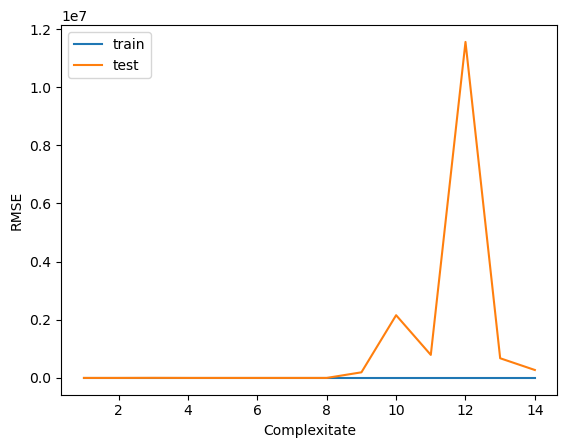

In [48]:
plt.plot(range(1,15),train_rmse_errors, label='train')
plt.plot(range(1,15),test_rmse_errors, label='test')
plt.xlabel("Complexitate")
plt.ylabel("RMSE")
plt.legend()
plt.show()

### Test 3 (polinom grad 2 -> rezultate mai bune)

In [49]:
X_3 = X

In [50]:
polynom_conv = PolynomialFeatures(degree=2, include_bias=False)

In [51]:
x_conv = polynom_conv.fit_transform(X_3)

In [52]:
x_conv.shape

(362, 27)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x_conv, y , test_size=0.3, random_state=68)
model3 = LinearRegression()

In [54]:
model3.fit(X_train, y_train)

LinearRegression()

In [55]:
test_pred_poly_2 = model3.predict(X_test)

In [56]:
MAE = mean_absolute_error(y_test, test_pred_poly_2)
MSE = mean_squared_error(y_test, test_pred_poly_2)
RMSE = np.sqrt(MSE)

In [57]:
MAE

0.16080603428776374

In [58]:
MSE

0.08206723402903561

In [59]:
RMSE

0.28647379291836733

### Test 4 (polinom grad 2 80/20)

In [60]:
X_4 = X

In [61]:
polynom_conv = PolynomialFeatures(degree=2, include_bias=False)

In [62]:
x_conv = polynom_conv.fit_transform(X_4)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x_conv, y , test_size=0.2, random_state=68)
model4 = LinearRegression()

In [64]:
model4.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred_poly_2 = model4.predict(X_test)

In [66]:
y_pred_poly_2

array([ 0.09055607,  0.13866602, -0.03205633,  0.06396956,  0.79106343,
        0.85938016,  0.12803118,  0.13502859,  0.06852148,  0.978262  ,
        0.14297913,  0.978262  ,  0.82121736,  0.9670041 ,  0.09055607,
        0.05520648,  0.90103308,  0.94406979,  0.03372657,  0.05068284,
        0.88025137,  0.09055607,  0.06396956,  0.13502859,  0.93304123,
       -0.03205633,  0.08836407, -0.16440729, -0.12788673,  0.205867  ,
        0.06396956,  0.12803118,  0.97515671,  0.85772713,  0.978262  ,
        0.84269846,  0.04354332,  0.94406979,  0.14297913,  0.15345764,
        0.01367109,  0.87329991,  0.90103308,  1.32174552, -0.04547575,
        0.03372657,  0.75630765,  0.06852148,  0.94406979,  0.48893774,
        0.93304123,  0.16997427,  0.75630765,  0.88025137,  0.95017721,
        0.09055607,  0.79106343, -0.80283822,  0.92085179,  0.9670041 ,
        0.02447349,  0.03372657,  1.00519004,  0.90103308,  0.37469215,
        0.04139719,  0.97515671,  0.02152618,  0.05068284,  0.05

In [67]:
MAE = mean_absolute_error(y_test, y_pred_poly_2)
MSE = mean_squared_error(y_test, y_pred_poly_2)
RMSE = np.sqrt(MSE)

In [68]:
MAE

0.15631073932660042

In [69]:
MSE

0.07130621819177083

In [70]:
RMSE

0.267032241858115

In [71]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder (Yes/No)
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,0
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,0
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,0
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1


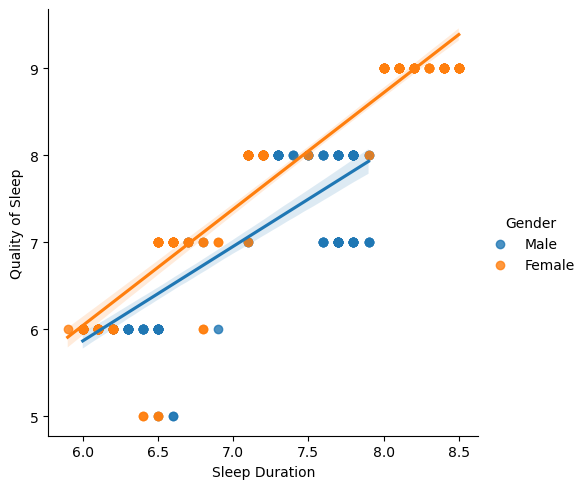

In [72]:
sns.lmplot(data=data, x="Sleep Duration", y="Quality of Sleep", hue="Gender")

In [73]:
X_4

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate
0,27,6.1,6,42,6,77
1,28,6.2,6,60,8,75
2,28,6.2,6,60,8,75
7,29,7.8,7,75,6,70
8,29,7.8,7,75,6,70
...,...,...,...,...,...,...
369,59,8.1,9,75,3,68
370,59,8.0,9,75,3,68
371,59,8.1,9,75,3,68
372,59,8.1,9,75,3,68


In [74]:
y

0      0
1      0
2      0
7      0
8      0
      ..
369    1
370    1
371    1
372    1
373    1
Name: Sleep Disorder (Yes/No), Length: 362, dtype: int64

In [75]:
# print("Enter the following details:")

try:
    age = float(input("Age: "))
    sleep_duration = float(input("Sleep Duration (hours): "))
    quality_of_sleep = float(input("Quality of Sleep (1-10): "))
    physical_activity = float(input("Physical Activity Level (1-10): "))
    stress_level = float(input("Stress Level (1-10): "))
    heart_rate = float(input("Heart Rate (bpm): "))

    user_data = np.array([[age, sleep_duration, quality_of_sleep, physical_activity, stress_level, heart_rate]])

    user_data_poly = polynom_conv.transform(user_data)

    prediction = model4.predict(user_data_poly)

    if prediction[0] >= 0.5:
        print("\n🔴 High probability of having a sleep disorder.")
    else:
        print("\n🟢 Low probability of having a sleep disorder.")

except ValueError:
    print("Invalid input. Please enter numeric values.")

Age: zz
Invalid input. Please enter numeric values.


### Schimb functia de label putin 

In [76]:
def func2(string: str)-> int:
    if string == "No Disorder":
        return 0
    elif string == "Sleep Apnea":
        return 1
    elif string == "Insomnia":
        return 2
data["Sleep Disorder Label"] = data["Sleep Disorder"]

In [77]:
data["Sleep Disorder"].value_counts()

Sleep Disorder
No Disorder    219
Insomnia        73
Sleep Apnea     70
Name: count, dtype: int64

In [78]:
data["Sleep Disorder Label"].value_counts()

Sleep Disorder Label
No Disorder    219
Insomnia        73
Sleep Apnea     70
Name: count, dtype: int64

In [79]:
data["Sleep Disorder Label"] = data["Sleep Disorder Label"].apply(func2)

In [80]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder (Yes/No),Sleep Disorder Label
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,0,0
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,0,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,0,0
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,0,0
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1


In [81]:
X_5 = data[["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate"]]
y_label = data["Sleep Disorder Label"]

In [82]:
y_label

0      0
1      0
2      0
7      0
8      0
      ..
369    1
370    1
371    1
372    1
373    1
Name: Sleep Disorder Label, Length: 362, dtype: int64

In [83]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

In [84]:
x_conv_label = poly_conv.fit_transform(X_5)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x_conv_label, y_label , test_size=0.2, random_state=68)
model5 = LinearRegression()

In [86]:
model5.fit(X_train, y_train)

LinearRegression()

In [87]:
y_predicted_label = model5.predict(X_test)

In [88]:
MAE = mean_absolute_error(y_test, y_predicted_label)
MSE = mean_squared_error(y_test, y_predicted_label)
RMSE = np.sqrt(MSE)

In [89]:
MAE

0.2326811099652458

In [90]:
MSE

0.16875027772364531

In [91]:
RMSE

0.4107922561631917

In [92]:
y_label.value_counts()

Sleep Disorder Label
0    219
2     73
1     70
Name: count, dtype: int64

In [93]:
data[data["Sleep Disorder Label"] == 1]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder (Yes/No),Sleep Disorder Label
16,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea,1,1
17,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Sleep Apnea,1,1
30,Female,30,Nurse,6.4,5,35,7,Normal Weight,130/86,78,4100,Sleep Apnea,1,1
49,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000,Sleep Apnea,1,1
103,Male,36,Teacher,6.6,5,35,7,Overweight,129/84,74,4800,Sleep Apnea,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1


In [94]:
joblib.dump(model5, "trained_model.pkl")
joblib.dump(poly_conv, "poly_transform.pkl")

['poly_transform.pkl']

In [95]:
print("Enter the following details:")

try:
    age = float(input("Age: "))
    sleep_duration = float(input("Sleep Duration (hours): "))
    quality_of_sleep = float(input("Quality of Sleep (1-10): "))
    physical_activity = float(input("Physical Activity Level (1-100): "))
    stress_level = float(input("Stress Level (1-10): "))
    heart_rate = float(input("Heart Rate (bpm): "))

    user_data = np.array([[age, sleep_duration, quality_of_sleep, physical_activity, stress_level, heart_rate]])

    user_data_poly = polynom_conv.transform(user_data)

    prediction = model5.predict(user_data_poly)

    if prediction[0] < 0.5:
        print("\n🟢 Low probability of having a sleep disorder.")
    elif prediction[0] > 0.5 and prediction[0] < 1.5:
        print("\n🔴 High probability of having Sleep Apnea.")
    elif prediction[0] >= 1.5:
        print("\n🔴 High probability of having Insomnia.")

except ValueError:
    print("Invalid input. Please enter numeric values.")

Enter the following details:
Age: zz
Invalid input. Please enter numeric values.


### Test 5 (mai putine coloane) Catastrofa

In [96]:
X_6 = data[["Sleep Duration", "Quality of Sleep", "Stress Level"]]
y_label_2 = data["Sleep Disorder Label"]

In [97]:
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [98]:
x_converted_3 = poly_converter.fit_transform(X_6)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x_converted_3, y_label_2 , test_size=0.2, random_state=101)
model6 = LinearRegression()

In [100]:
model6.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred_3_cols = model6.predict(X_test)

In [102]:
MAE = mean_absolute_error(y_test, y_pred_3_cols)
MSE = mean_squared_error(y_test, y_pred_3_cols)
RMSE = np.sqrt(MSE)

In [103]:
MAE

0.5036703554464393

In [104]:
MSE

0.4545136419751148

In [105]:
RMSE

0.6741762692168234

### Test 6 - Logistic regression scalat

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [107]:
y_label.value_counts()

Sleep Disorder Label
0    219
2     73
1     70
Name: count, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_5, y_label, test_size=0.3, random_state=101)

<Axes: ylabel='Count'>

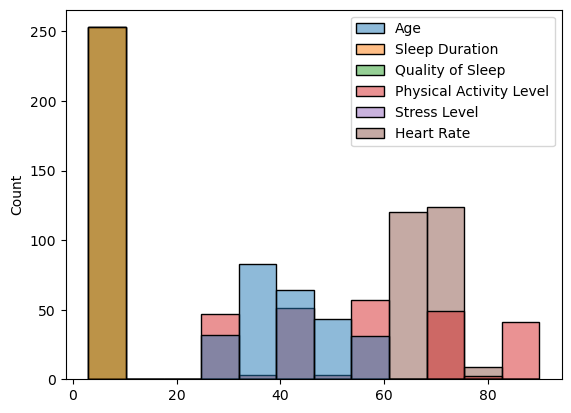

In [109]:
sns.histplot(X_train)

In [110]:
scaler = StandardScaler()

['scaler.pkl']

In [111]:
scaled_X_train = scaler.fit_transform(X_train)

In [112]:
scaled_X_test = scaler.transform(X_test)

<Axes: ylabel='Count'>

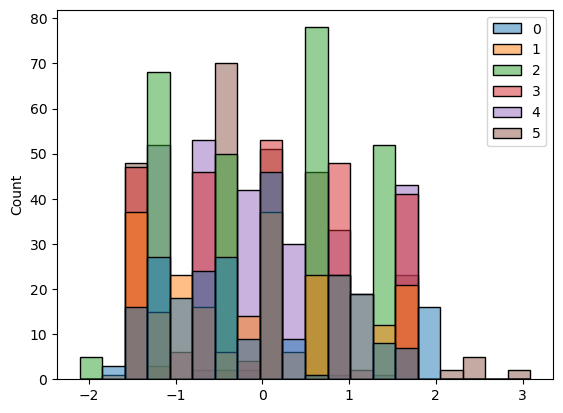

In [113]:
sns.histplot(scaled_X_train)

In [114]:
log_model = LogisticRegression()
joblib.dump(model6, "trained_model_log.pkl")

['trained_model_log.pkl']

In [115]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [116]:
y_pred = log_model.predict(scaled_X_test)

In [117]:
y_pred

array([1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2,
       0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1],
      dtype=int64)

In [118]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report

<Axes: >

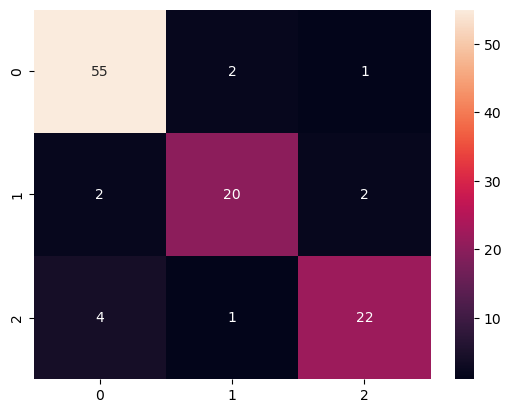

In [119]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [120]:
accuracy_score(y_test, y_pred)

0.8899082568807339

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.87      0.83      0.85        24
           2       0.88      0.81      0.85        27

    accuracy                           0.89       109
   macro avg       0.88      0.87      0.87       109
weighted avg       0.89      0.89      0.89       109



In [122]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder (Yes/No),Sleep Disorder Label
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,0,0
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,0,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,0,0
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,0,0
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1


In [123]:
date = [[29, 7.8, 7, 75, 6, 70]]
date_pred = log_model.predict(date)

In [124]:
date_pred

array([1], dtype=int64)

### Test 7 -  Logistic regression nescalat

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_5, y_label, test_size=0.2, random_state=101)
log_model_2 = LogisticRegression()

In [126]:
log_model_2.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
y_predd = log_model_2.predict(X_test)

In [128]:
y_predd

array([1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       1, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2,
       0, 1, 0, 1, 1, 0, 2], dtype=int64)

In [129]:
accuracy_score(y_test, y_predd)

0.8767123287671232

<Axes: >

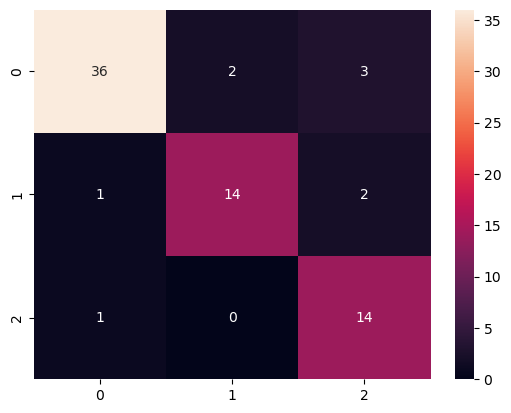

In [130]:
sns.heatmap(confusion_matrix(y_test, y_predd), annot=True)

### Test 8 - Logistic regression scalat Daily Steps

In [131]:
X_8 = data[["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]]

In [132]:
X_8

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,27,6.1,6,42,6,77,4200
1,28,6.2,6,60,8,75,10000
2,28,6.2,6,60,8,75,10000
7,29,7.8,7,75,6,70,8000
8,29,7.8,7,75,6,70,8000
...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000
370,59,8.0,9,75,3,68,7000
371,59,8.1,9,75,3,68,7000
372,59,8.1,9,75,3,68,7000


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_8, y_label, test_size=0.2, random_state=101)
log_model_3 = LogisticRegression()
joblib.dump(model6, "trained_model_log.pkl")

['trained_model_log.pkl']

In [154]:
scaler_2 = StandardScaler()
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [135]:
scaler_2_X_train = scaler_2.fit_transform(X_train)

In [136]:
scaler_2_X_test = scaler_2.transform(X_test)

In [137]:
log_model_3.fit(scaler_2_X_train, y_train)

LogisticRegression()

In [138]:
y_preddd = log_model_3.predict(scaler_2_X_test)

In [139]:
y_preddd

array([1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2,
       0, 1, 0, 1, 1, 0, 2], dtype=int64)

In [140]:
accuracy_score(y_test, y_preddd)

0.9041095890410958

In [151]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder (Yes/No),Sleep Disorder Label
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,0,0
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,0,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,0,0
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,0,0
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,1


In [152]:
date = [[59, 8.1, 9, 75, 3, 68, 7000]]

date_scaled = scaler_2.transform(date)
date_pred = log_model_3.predict(date_scaled)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [153]:
date_pred

array([1], dtype=int64)